In [15]:
"""
Trading Strategies for Stock Analysis

In this notebook, we apply various traditional trading strategies on a selected stock.
We use historical stock data (closing prices and volume) from Yahoo Finance, and then simulate trades 
using different strategies through the Trade_Simulator class.

Strategies implemented:
- Momentum
- Mean Reversion with Bollinger Bands
- Breakout
- Relative Strength Index (RSI) based
- Moving Average Convergence/Divergence (MACD)
- Volume Weighted Average Price (VWAP)
"""


'\nTrading Strategies for Stock Analysis\n\nIn this notebook, we apply various traditional trading strategies on a selected stock.\nWe use historical stock data (closing prices and volume) from Yahoo Finance, and then simulate trades \nusing different strategies through the Trade_Simulator class.\n\nStrategies implemented:\n- Momentum\n- Mean Reversion with Bollinger Bands\n- Breakout\n- Relative Strength Index (RSI) based\n- Moving Average Convergence/Divergence (MACD)\n- Volume Weighted Average Price (VWAP)\n'

In [16]:

import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import coint
from datetime import datetime, timedelta
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

#import the trade simulator from the repository.
from trade_simulator import Trade_Simulator

In [24]:
# Configuration
# Select the stock ticker (Walmart in this example)
stock = "AAPL"

# Define the period for analysis
start_date = "2010-01-01"
end_date   = "2015-01-01"

# Download historical data (Close and Volume) from Yahoo Finance
data = yf.download(stock, start=start_date, end=end_date)[["Close", "Volume"]].dropna()

[*********************100%***********************]  1 of 1 completed


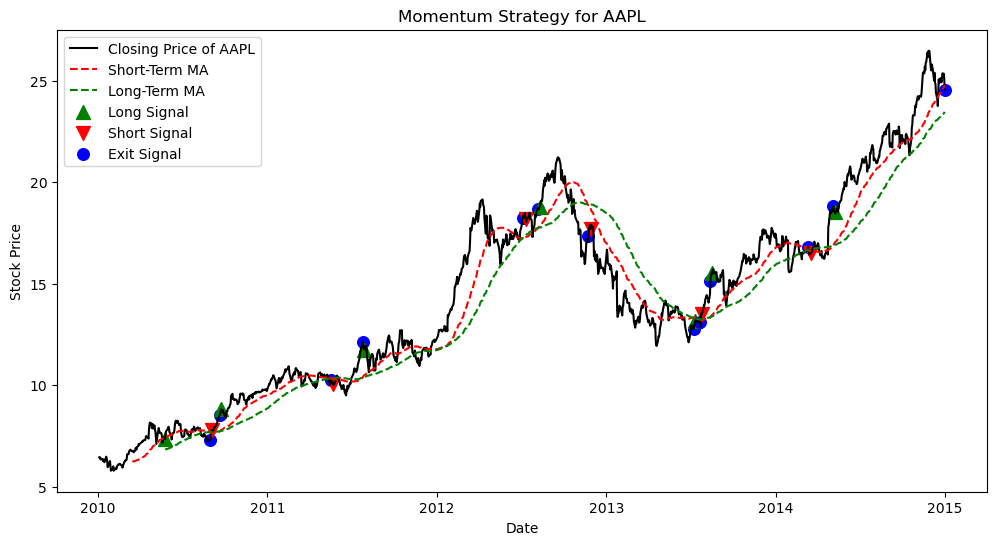

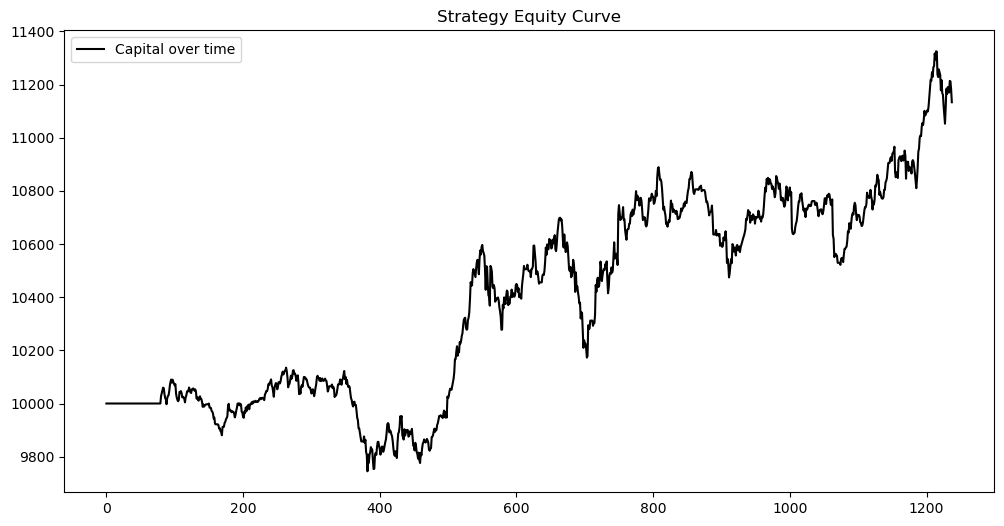

,Date,Type,Remaining Capital,Exit Price,Final Capital
0,2010-05-26,LONG,9265.385008,NaN,NaN
1,2010-08-31,EXIT,NaN,7.315751,9996.960115
2,2010-09-03,SHORT,10775.692320,NaN,NaN
3,2010-09-21,EXIT,NaN,8.539659,9921.726465
4,2010-09-24,LONG,9042.030478,NaN,NaN
5,2011-05-18,EXIT,NaN,10.227909,10064.821386
6,2011-05-23,SHORT,11071.151400,NaN,NaN
7,2011-07-26,EXIT,NaN,12.140059,9857.145548
8,2011-07-29,LONG,8682.050657,NaN,NaN
9,2012-07-06,EXIT,NaN,18.233110,10505.361700


In [25]:
# Each call to Trade_Simulator runs a specific trading strategy on the data.
# The function is expected to:
# - Simulate trades
# - Plot trade entries and portfolio value
# - Provide a trade log

# Momentum Trading Strategy:
# - Signal to short when the short-term moving average falls below the long-term moving average, 
#   and vice versa.
Trade_Simulator(stock, data, "momentum",log=True)

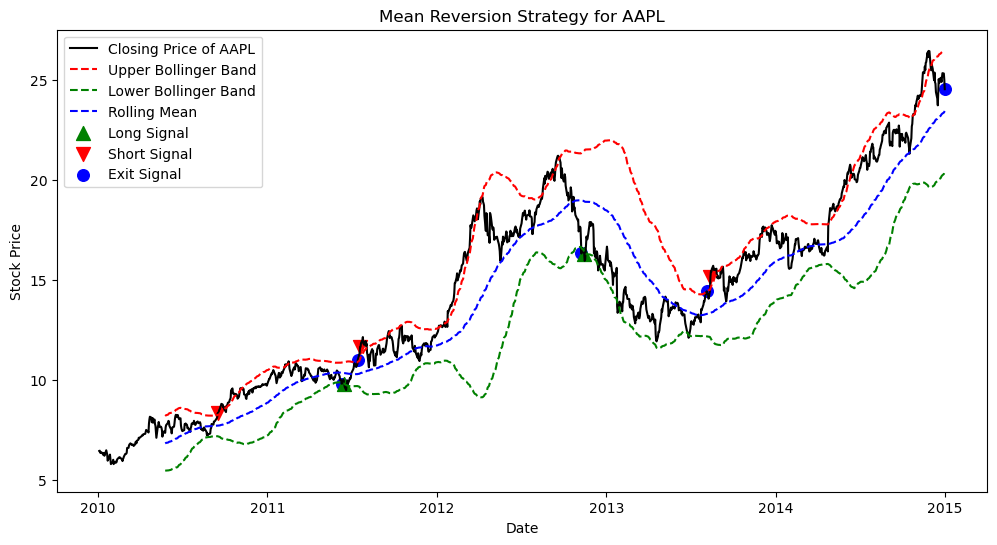

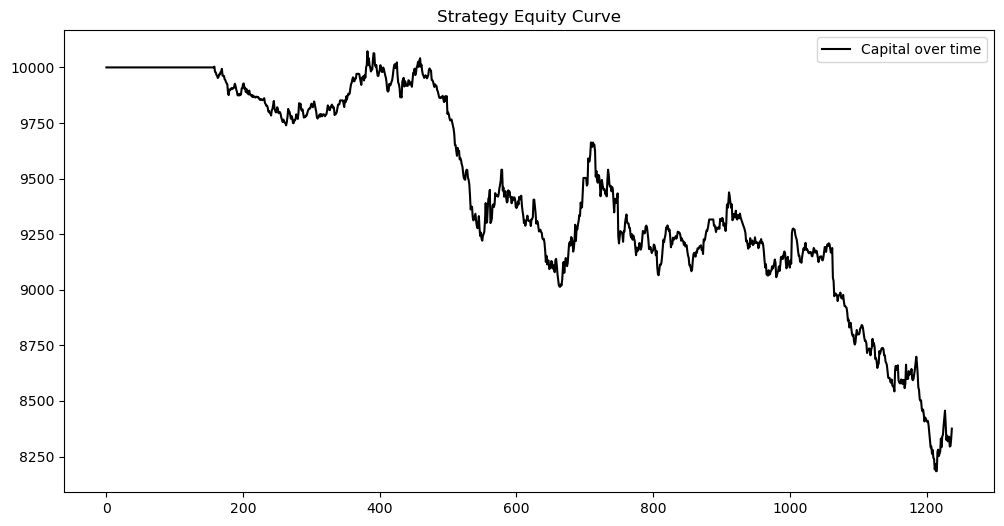

In [19]:
# Mean Reversion Strategy with Bollinger Bands:
# - Use a 100-day rolling mean and bands to determine overbought/oversold conditions.
Trade_Simulator(stock, data, "mean_reversion")

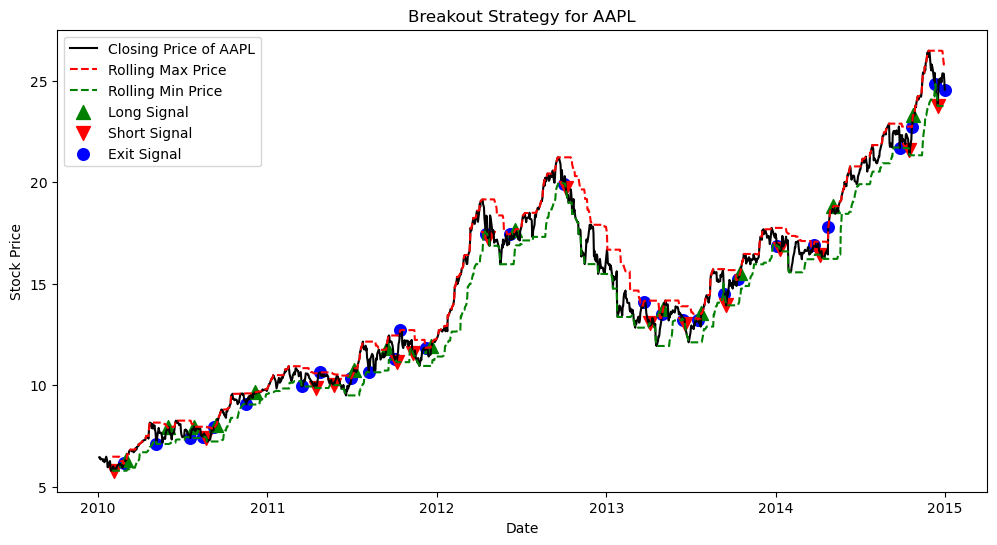

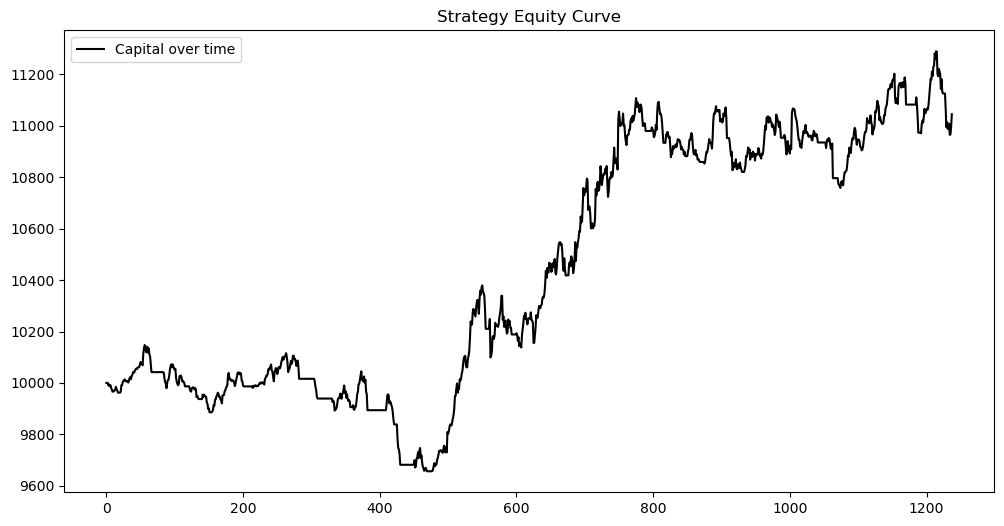

In [20]:
# Breakout Strategy:
# - Go short if the price is the minimum of the past 20 days, and go long if it's the maximum.
Trade_Simulator(stock, data, "breakout")

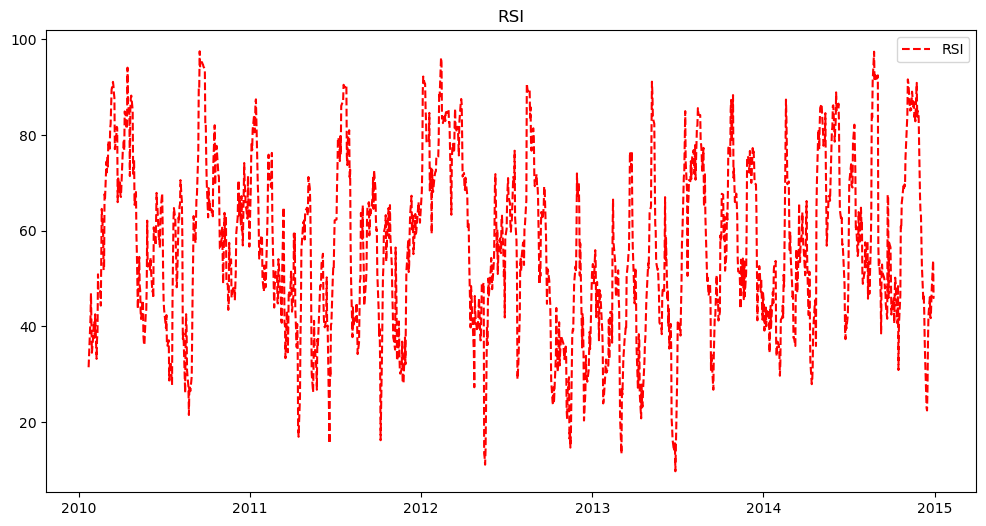

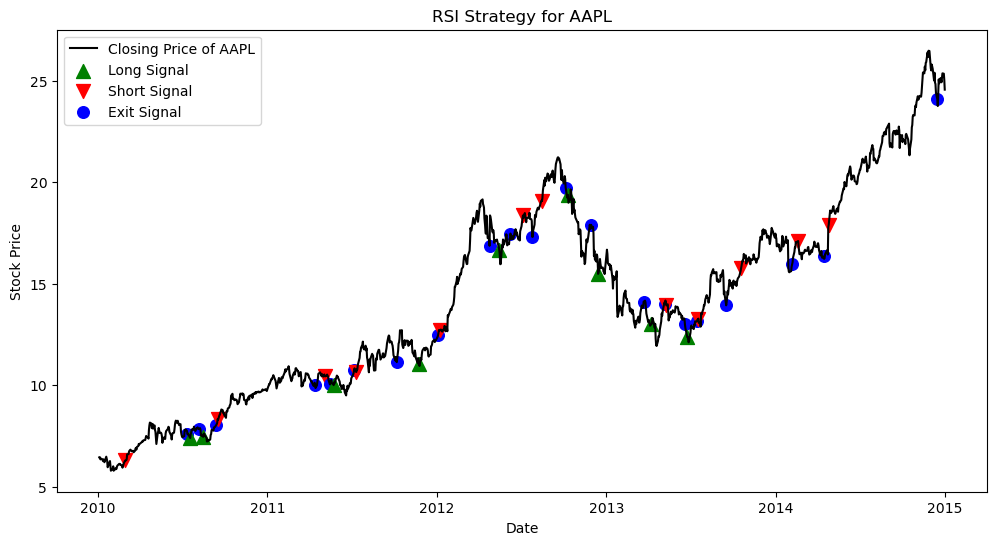

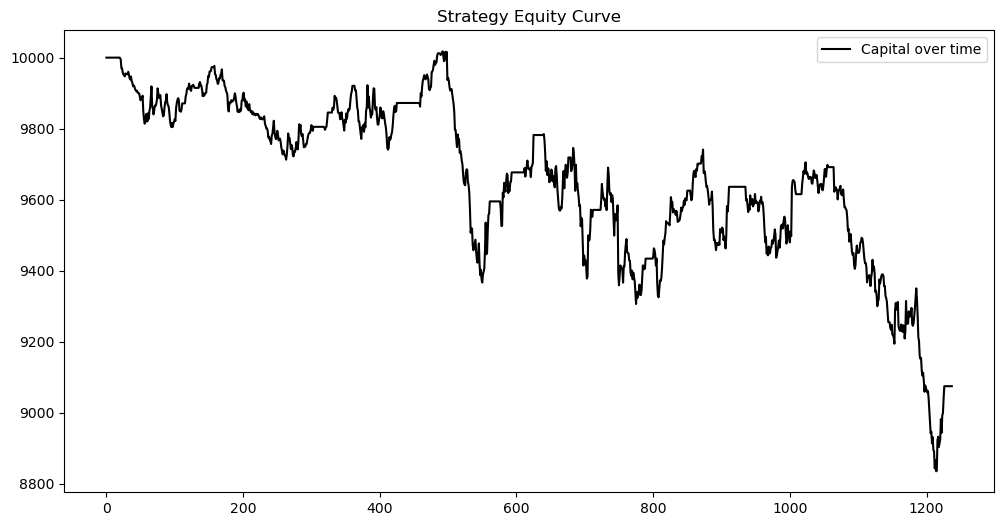

In [21]:
# RSI-based Strategy:
# - Go long if RSI < 30 (oversold) and short if RSI > 70 (overbought).
Trade_Simulator(stock, data, "rsi")

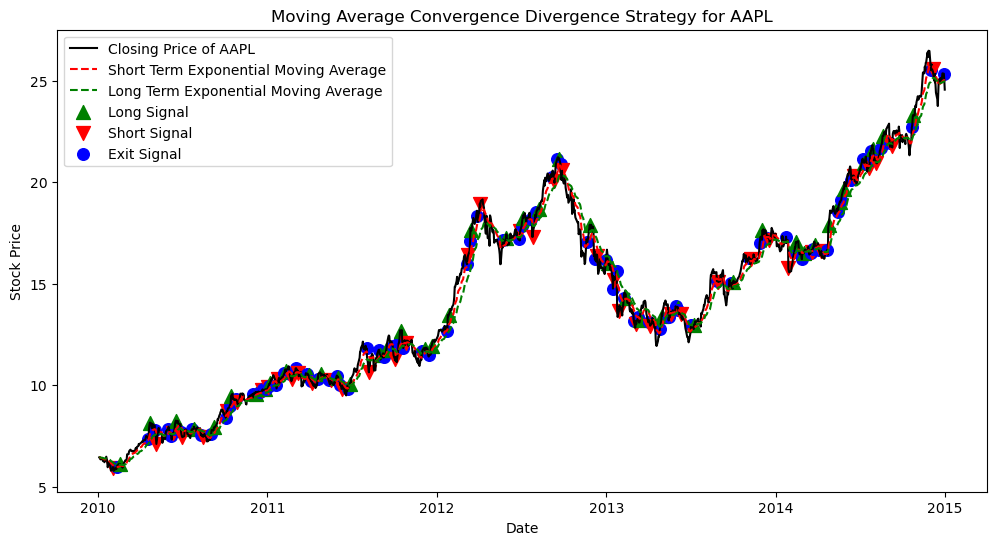

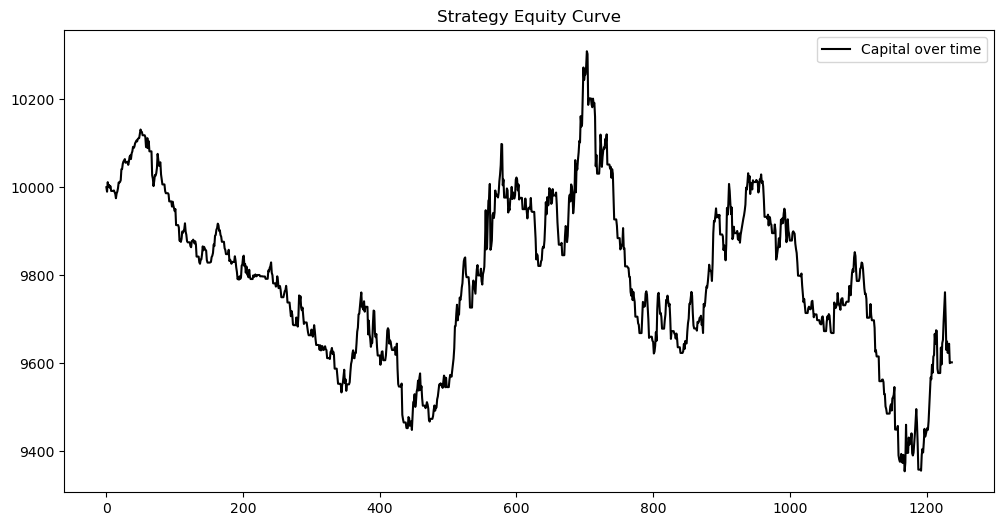

,Date,Type,Remaining Capital,Exit Price,Final Capital
0,2010-02-02,SHORT,10589.413261,NaN,NaN
1,2010-02-11,EXIT,NaN,5.978695,9991.543722
2,2010-02-17,LONG,9381.997824,NaN,NaN
3,2010-04-20,EXIT,NaN,7.360594,10118.057203
4,2010-04-23,LONG,9303.032064,NaN,NaN
...,...,...,...,...,...
169,2014-10-21,EXIT,NaN,22.696011,9358.420801
170,2014-10-24,LONG,7027.910089,NaN,NaN
171,2014-12-02,EXIT,NaN,25.499418,9577.851915
172,2014-12-05,SHORT,12136.023951,NaN,NaN


In [22]:
# MACD Strategy:
# - Trading signals based on the MACD (12, 26, 9) indicator.
Trade_Simulator(stock, data, "macd",log=True)

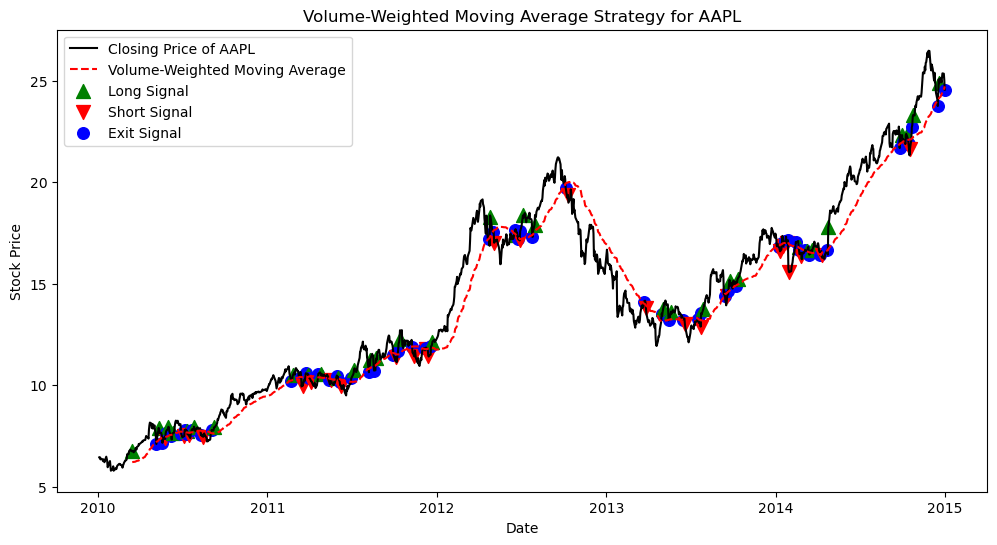

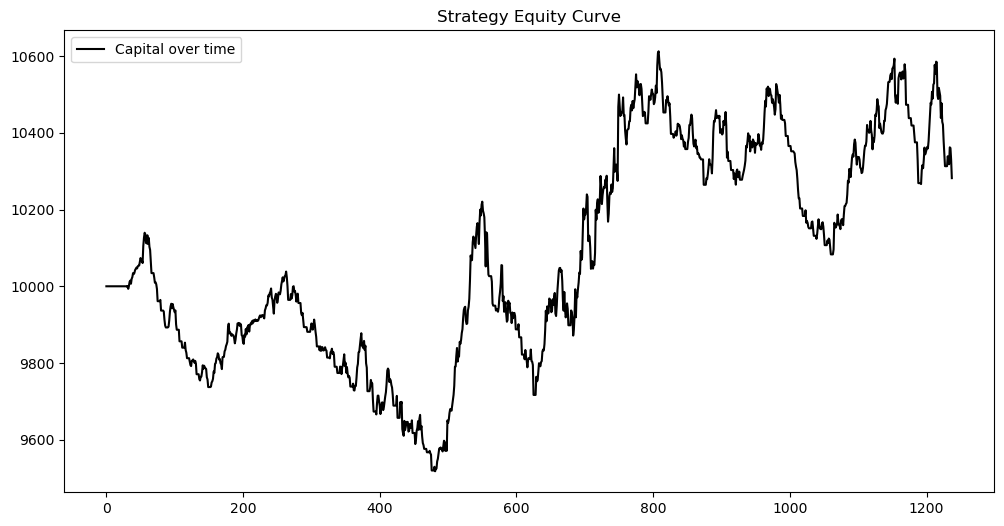

In [23]:
# VWAP Strategy:
# - Calculate a volume-weighted moving average (VWAP) over a 50-day rolling window.
Trade_Simulator(stock, data, "vwap")